In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.io import *
from fastai.conv_learner import *
from fastai.text import *
from fastai.column_data import *

In [ ]:
sql_ids = np.load('sql_ids.npy')
sql_itos = pickle.load(open(TMP_PATH/'sql_itos.pkl','rb'))
sql_stoi =  collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(sql_itos)})

In [ ]:
   stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    ids = np.array([([0] + [stoi[o] for o in p] + [2]) for p in tok]) # pad bos at beginning and eos at the end
    np.save(TMP_PATH/f'{pre}_ids.npy', ids)
    pickle.dump(itos, open(TMP_PATH/f'{pre}_itos.pkl', 'wb'))

## Setup

Set up directory path

In [2]:
DATA_PATH = Path('data')
DATA_PATH
TMP_PATH = DATA_PATH/'tmp'
TMP_PATH.mkdir(exist_ok=True)

In [3]:
dataset = pd.read_json(DATA_PATH/'train.json')
dataset.head()


,comments,description,id,sql,sql_plain,title,url
0,[],,586912,"SELECT p.Title,p.score,p.ViewCount,p.AnswerCou...","SELECT \np.Title,p.score,p.ViewCount,p.AnswerC...",Repent 151-160,http://data.stackexchange.com/stackoverflow/re...
1,[This is test data for my question to make thi...,,54791,"CREATE TABLE #CustomerDB ( ID int NOT NULL, NA...",-- This is test data for my question to make t...,This is test data for my question to make thin...,http://data.stackexchange.com/stackoverflow/re...
2,[],,611565,select Id from Comments where lower(Text) like...,select Id\nfrom Comments \nwhere lower(Text) l...,Accept answer,http://data.stackexchange.com/stackoverflow/re...
3,[],,612812,"DECLARE @From DATETIME = convert(DATETIME, '##...","DECLARE @From DATETIME = convert(DATETIME, '##...",Questions with most views created within 3 mon...,http://data.stackexchange.com/stackoverflow/re...
4,"[Most Prolific Answerers (with score), Shows t...",,325114,"SELECT TOP 50 OwnerUserId as [User Link], COUN...",-- Most Prolific Answerers (with score)\n-- Sh...,Most Prolific Answers,http://data.stackexchange.com/stackoverflow/re...


In [4]:
SQL = dataset.sql

In [5]:
## Transform the text to be tokenize readily, as certain token has special meaning in SQL, ie. "." means the schema relation
token_replaced = {',' : ' , ',
                 '#' : ' # ',
                 '@' : ' @ ',
                 '!' : ' ! ',
                 '.' : ' . ',
                 '%' : ' % ',
                 '?' : ' ? ',
                 ')' : ' ) ',
                 '(' : ' ( ',
                 '=' : ' = ',
                 '/' : ' / ',
                 '*' : ' * '}
    

In [6]:
def fixup(x):
    for bereplaced, replace in token_replaced.items():        
        x = x.replace(bereplaced, replace)
    return x

In [7]:
SQL = SQL.apply(fixup)## Sanity Check
SQL.iloc[0]

'SELECT p . Title , p . score , p . ViewCount , p . AnswerCount , p . CommentCount , LEN ( p . body )  as ques_size ,  p . favoritecount , p . id ,  u . reputation as user_repo , u . creationdate as user_join_date ,  datediff ( MINUTE ,  p . CreationDate ,  a . CreationDate )  as QATimeGap from posts as p ,  posts as a ,  users as u where p . id = a . parentId and p . owneruserid = u . id and a . creationdate  =   ( select min ( tau . creationdate )  from posts tau where tau . parentID = p . id group by tau . parentID )  and  (  p . title like \' % Recommended method for handling UnsupportedEncodingException from String . getBytes ( "UTF-8" )  % \' or p . title like \' % Way to format strings with " ? " parameters to full string in java ?  % \' or p . title like \' % How to parse a string without regular expressions % \' or p . title like \' % How to replace string only once without regex in Java ?  % \' or p . title like \' % Efficiently removing specific characters  ( some punctuatio

In [8]:
SQL.iloc[0]

'SELECT p . Title , p . score , p . ViewCount , p . AnswerCount , p . CommentCount , LEN ( p . body )  as ques_size ,  p . favoritecount , p . id ,  u . reputation as user_repo , u . creationdate as user_join_date ,  datediff ( MINUTE ,  p . CreationDate ,  a . CreationDate )  as QATimeGap from posts as p ,  posts as a ,  users as u where p . id = a . parentId and p . owneruserid = u . id and a . creationdate  =   ( select min ( tau . creationdate )  from posts tau where tau . parentID = p . id group by tau . parentID )  and  (  p . title like \' % Recommended method for handling UnsupportedEncodingException from String . getBytes ( "UTF-8" )  % \' or p . title like \' % Way to format strings with " ? " parameters to full string in java ?  % \' or p . title like \' % How to parse a string without regular expressions % \' or p . title like \' % How to replace string only once without regex in Java ?  % \' or p . title like \' % Efficiently removing specific characters  ( some punctuatio

In [9]:
sql_tok = Tokenizer.proc_all_mp(partition_by_cores(SQL)) 

In [10]:
sql_tok[0]

[' ',
 't_up',
 'select',
 'p',
 '.',
 'title',
 ',',
 'p',
 '.',
 'score',
 ',',
 'p',
 '.',
 'viewcount',
 ',',
 'p',
 '.',
 'answercount',
 ',',
 'p',
 '.',
 'commentcount',
 ',',
 't_up',
 'len',
 '(',
 'p',
 '.',
 'body',
 ')',
 'as',
 'ques_size',
 ',',
 'p',
 '.',
 'favoritecount',
 ',',
 'p',
 '.',
 'i',
 'd',
 ',',
 'u',
 '.',
 'reputation',
 'as',
 'user_repo',
 ',',
 'u',
 '.',
 'creationdate',
 'as',
 'user_join_date',
 ',',
 'datediff',
 '(',
 't_up',
 'minute',
 ',',
 'p',
 '.',
 'creationdate',
 ',',
 'a',
 '.',
 'creationdate',
 ')',
 'as',
 'qatimegap',
 'from',
 'posts',
 'as',
 'p',
 ',',
 'posts',
 'as',
 'a',
 ',',
 'users',
 'as',
 'u',
 'where',
 'p',
 '.',
 'i',
 'd',
 '=',
 'a',
 '.',
 'parentid',
 'and',
 'p',
 '.',
 'owneruserid',
 '=',
 'u',
 '.',
 'i',
 'd',
 'and',
 'a',
 '.',
 'creationdate',
 '=',
 '(',
 'select',
 'min',
 '(',
 'tau',
 '.',
 'creationdate',
 ')',
 'from',
 'posts',
 'tau',
 'where',
 'tau',
 '.',
 'parentid',
 '=',
 'p',
 '.',
 'i',
 'd

In [11]:
def toks2ids(tok,pre):
    freq = Counter(p for o in tok for p in o)
    itos = [o for o,c in freq.most_common()]
    itos.insert(0, '_bos_')
    itos.insert(1, '_pad_')
    itos.insert(2, '_eos_')
    itos.insert(3, '_unk')
    stoi = collections.defaultdict(lambda: 3, {v:k for k,v in enumerate(itos)})
    ids = np.array([([0] + [stoi[o] for o in p] + [2]) for p in tok]) # pad bos at beginning and eos at the end
    np.save(TMP_PATH/f'{pre}_ids.npy', ids)
    pickle.dump(itos, open(TMP_PATH/f'{pre}_itos.pkl', 'wb'))
    return ids,itos,stoi

In [12]:
sql_ids,sql_itos,sql_stoi = toks2ids(sql_tok,'sql')

In [13]:
sql_ids_concat= []
for i in sql_ids:
    sql_ids_concat += i

In [14]:
sql_ids.shape

(24594,)

In [15]:
vocab_size = len(sql_itos)
print('total chars:', vocab_size)

total chars: 23102


## Three char model

### Create inputs

Create a list of every 4th character, starting at the 0th, 1st, 2nd, then 3rd characters

In [16]:
idx = sql_ids_concat

In [17]:
char_indices = sql_stoi
indices_char = sql_itos

In [18]:
cs=3
c1_dat = [idx[i]   for i in range(0, len(idx)-cs, cs)]
c2_dat = [idx[i+1] for i in range(0, len(idx)-cs, cs)]
c3_dat = [idx[i+2] for i in range(0, len(idx)-cs, cs)]
c4_dat = [idx[i+3] for i in range(0, len(idx)-cs, cs)]

In [19]:
(c1_dat[:10],
c2_dat[:10],
c3_dat[:10])

([0, 14, 104, 5, 19, 6, 122, 5, 4, 19],
 [40, 19, 6, 34, 5, 19, 6, 198, 128, 5],
 [4, 5, 19, 6, 93, 5, 19, 6, 8, 79])

Our inputs

In [20]:
len(c1_dat),len(c2_dat)

(786352, 786352)

In [21]:
x1 = np.stack(c1_dat)
x2 = np.stack(c2_dat)
x3 = np.stack(c3_dat)

Our output

In [22]:
y = np.stack(c4_dat)

In [23]:
c4_dat[:10]

[14, 104, 5, 19, 6, 122, 5, 4, 19, 7]

In [24]:
y[:10]

array([ 14, 104,   5,  19,   6, 122,   5,   4,  19,   7])

The first 4 inputs and outputs

In [25]:
x1[:4], x2[:4], x3[:4]

(array([  0,  14, 104,   5]), array([40, 19,  6, 34]), array([ 4,  5, 19,  6]))

In [26]:
y[:4]

array([ 14, 104,   5,  19])

In [27]:
x1.shape, y.shape

((786352,), (786352,))

### Create and train model

Pick a size for our hidden state

In [28]:
n_hidden = 256

The number of latent factors to create (i.e. the size of the embedding matrix)

In [29]:
n_fac = 42

In [30]:
class Char3Model(nn.Module):
    def __init__(self, vocab_size, n_fac):
        super().__init__()
        self.e = nn.Embedding(vocab_size, n_fac)

        # The 'green arrow' from our diagram - the layer operation from input to hidden
        self.l_in = nn.Linear(n_fac, n_hidden)

        # The 'orange arrow' from our diagram - the layer operation from hidden to hidden
        self.l_hidden = nn.Linear(n_hidden, n_hidden)
        
        # The 'blue arrow' from our diagram - the layer operation from hidden to output
        self.l_out = nn.Linear(n_hidden, vocab_size)
        
    def forward(self, c1, c2, c3):
        in1 = F.relu(self.l_in(self.e(c1)))
        in2 = F.relu(self.l_in(self.e(c2)))
        in3 = F.relu(self.l_in(self.e(c3)))
        
        h = V(torch.zeros(in1.size()).cuda())
        h = F.tanh(self.l_hidden(h+in1))
        h = F.tanh(self.l_hidden(h+in2))
        h = F.tanh(self.l_hidden(h+in3))
        
        return F.log_softmax(self.l_out(h))

In [31]:
md = ColumnarModelData.from_arrays('.', [-1], np.stack([x1,x2,x3], axis=1), y, bs=4096)

In [32]:
m = Char3Model(vocab_size, n_fac).cuda()

In [33]:
it = iter(md.trn_dl)
*xs,yt = next(it)
t = m(*V(xs))

In [34]:
opt = optim.Adam(m.parameters(), 1e-2)

In [35]:
fit(m, md, 1, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      3.168653   0.581217  



[array([0.58122])]

In [36]:
!nvidia-smi

Thu Apr 19 05:13:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 387.34                 Driver Version: 387.34                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    95W / 149W |    728MiB / 11439MiB |     73%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [37]:
set_lrs(opt, 0.001)

In [38]:
??set_lrs

In [39]:
F.nll_loss

<function torch.nn.functional.nll_loss>

In [40]:
fit(m, md, 1, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      2.189725   0.738436  



[array([0.73844])]

In [41]:
fit(m, md, 1, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      2.025342   0.826298  



[array([0.8263])]

In [42]:
fit(m, md, 1, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      1.92159    0.833474  



[array([0.83347])]

In [43]:
fit(m, md, 3, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      1.855852   0.744239  
    1      1.794819   1.006101                                
    2      1.75691    0.712873                                



[array([0.71287])]

## Wrap Char3Model to fastai learner

In [47]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [48]:
model = RNN_Learner(md, SingleModel(to_gpu(m)), opt_fn=opt_fn)

In [49]:
model.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 63%|██████▎   | 964/1536 [00:50<00:29, 19.25it/s, loss=6.62]

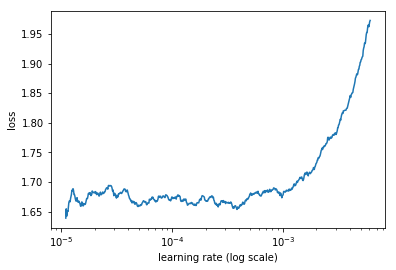

In [64]:
model.sched.plot(n_skip_end = 250)

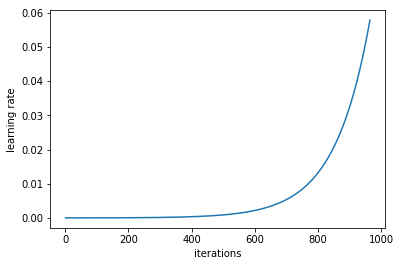

In [53]:
model.sched.plot_lr()

In [67]:
model.fit(1e-5,1, cycle_len=5,use_clr_beta = (10,10,0.95,0.85))

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss                                
    0      1.649082   0.732169  
    1      1.637239   0.728866                                
    2      1.640611   0.742777                                
    3      1.641455   0.74946                                 
    4      1.638865   0.7533                                  



[array([0.7533])]

In [69]:
model.save('model1')

### Test model

In [118]:
def get_next(inp):
    idxs = T(np.array([char_indices[c] for c in inp]))
    p = m(*VV(idxs))
    i = np.argmax(to_np(p))    
    return indices_char[i]

In [150]:
inp = ['_bos_','t_up','select']

In [151]:
get_next(inp[-3:])

't_up'

In [152]:
def get_sentence(inp):
    sentence = inp
    counter = 0
    tmp = []
    while "_eos_" not in tmp:   
        tmp = get_next(sentence[-3:]) # always get last three
        sentence += [tmp]
        counter = counter+1
        if counter> 500:
            break
    return sentence
        

In [163]:
def show_sentence(inp):
    sentence =''
    captialize = True
    for i in inp:
        if i =='t_up':
            captialize = True
        else:            
                if captialize:
                sentence = sentence + i
            captialize = False
            if captialize:
                sentence = sentence + i
            else:
                sentence = setence + i.upper()
    return sentence

In [164]:
a=get_sentence(['_bos_','t_up','select'])

In [165]:
show_sentence(a)

"_bos_selecttop100idas[postlink],reputationfromuserswherelower(location)like'%<'2013-01-01'andreputation>=1000orderbyreputationdesc;_eos_"

In [86]:
import pdb

In [73]:
get_next(['select', '*', 'from'])

'users'

In [77]:
get_next(['t_up','left','t_up'])

'join'

In [67]:
get_next('')

'on'

In [50]:
get_next('and')

' '

## Our first RNN!

### Create inputs

This is the size of our unrolled RNN.

In [80]:
cs=8

For each of 0 through 7, create a list of every 8th character with that starting point. These will be the 8 inputs to our model.

In [81]:
c_in_dat = [[sql_ids_concat[i+j] for i in range(cs)] for j in range(len(sql_ids_concat)-cs)]

Then create a list of the next character in each of these series. This will be the labels for our model.

In [82]:
c_out_dat = [sql_ids_concat[j+cs] for j in range(len(sql_ids_concat)-cs)]

In [83]:
xs = np.stack(c_in_dat, axis=0)

In [84]:
xs

array([[    0, 12968,    40, ...,    19,     5,   104],
       [12968,    40,     4, ...,     5,   104,     6],
       [   40,     4,    14, ...,   104,     6,    19],
       ...,
       [    5,    79,    28, ...,   254,    31,     9],
       [   79,    28,    21, ...,    31,     9,     4],
       [   28,    21,     9, ...,     9,     4,   126]])

In [62]:
xs.shape

(24586, 8)

In [85]:
y = np.stack(c_out_dat)

In [86]:
y

array([  6,  19,   5, ...,   4, 126,   2])

So each column below is one series of 8 characters from the text.

In [87]:
xs[:cs,:cs]

array([[    0, 12968,    40,     4,    14,    19,     5,   104],
       [12968,    40,     4,    14,    19,     5,   104,     6],
       [   40,     4,    14,    19,     5,   104,     6,    19],
       [    4,    14,    19,     5,   104,     6,    19,     5],
       [   14,    19,     5,   104,     6,    19,     5,    34],
       [   19,     5,   104,     6,    19,     5,    34,     6],
       [    5,   104,     6,    19,     5,    34,     6,    19],
       [  104,     6,    19,     5,    34,     6,    19,     5]])

...and this is the next character after each sequence.

In [88]:
y[:cs]

array([ 6, 19,  5, 34,  6, 19,  5, 93])

### Create and train model

In [92]:
val_idx = get_cv_idxs(len(sql_ids_concat)-cs-1)

In [93]:
md = ColumnarModelData.from_arrays('.', val_idx, xs, y, bs=512)

In [94]:
class CharLoopModel(nn.Module):
    # This is an RNN!
    def __init__(self, vocab_size, n_fac):
        super().__init__()
        self.e = nn.Embedding(vocab_size, n_fac)
        self.l_in = nn.Linear(n_fac, n_hidden)
        self.l_hidden = nn.Linear(n_hidden, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        
    def forward(self, *cs):
        bs = cs[0].size(0)
        h = V(torch.zeros(bs, n_hidden).cuda())
        for c in cs:
            inp = F.relu(self.l_in(self.e(c)))
            h = F.tanh(self.l_hidden(h+inp))
        
        return F.log_softmax(self.l_out(h), dim=-1)

In [98]:
n_fac = 42
n_hidden = 256


In [99]:
m = CharLoopModel(vocab_size, n_fac).cuda()
opt = optim.Adam(m.parameters(), 1e-2)

AssertionError: Torch not compiled with CUDA enabled

In [65]:
fit(m, md, 1, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                              
    0      2.007229   1.989802  



[1.9898024265275085]

In [66]:
set_lrs(opt, 0.001)

In [67]:
fit(m, md, 1, opt, F.nll_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                              
    0      1.728301   1.714505  



[1.7145047643787454]

In [48]:
bs

NameError: name 'bs' is not defined

In [52]:
class CharLoopConcatModel(nn.Module):
    def __init__(self, vocab_size, n_fac):
        super().__init__()
        self.e = nn.Embedding(vocab_size, n_fac)
        self.l_in = nn.Linear(n_fac+n_hidden, n_hidden)
        self.l_hidden = nn.Linear(n_hidden, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        
    def forward(self, *cs):
        bs = cs[0].size(0)
        h = V(torch.zeros(bs, n_hidden).cuda())
        for c in cs:
            inp = torch.cat((h, self.e(c)), 1)
            print(h.size())
            print(c.size())
            print(self.e(c).size())
            print(c)
            inp = F.relu(self.l_in(inp))
            h = F.tanh(self.l_hidden(inp))
        
        return F.log_softmax(self.l_out(h), dim=-1)

In [53]:
m = CharLoopConcatModel(vocab_size, n_fac).cuda()
opt = optim.Adam(m.parameters(), 1e-3)

In [54]:
it = iter(md.trn_dl)
*xs,yt = next(it)
t = m(*V(xs))

torch.Size([512, 256])
torch.Size([512])
torch.Size([512, 42])
Variable containing:
  1
  9
  2
 73
 72
 36
 67
 71
 68
  2
  2
 71
 58
 67
 63
 67
 68
 58
 23
 67
  2
 58
 56
 73
 58
 72
 74
  2
  1
 73
 67
 56
 68
 61
 61
 58
 68
 72
  2
  1
 58
 58
 73
 21
 72
 62
 67
 67
 59
 65
 72
 78
 72
 61
 62
 54
  2
 47
  2
 68
 62
 54
 56
 68
 54
 72
  1
 59
  2
 72
 67
 68
 73
 54
 62
  2
  2
 67
 58
 62
 68
 56
  2
 57
 61
 71
 73
  2
  2
 54
  2
  2
 54
 10
 58
 65
 58
 33
 61
  2
 62
 67
 73
 67
 72
 65
 56
 67
 73
  2
  2
 61
 59
 67
 73
 67
 67
 72
 10
 58
  8
  2
 68
 66
 54
 60
 54
 54
  2
 73
 69
 10
 62
 68
 59
 62
 72
 60
 55
 68
  2
 37
  2
 68
 54
 62
  8
 77
 71
 62
 58
 65
 73
 72
 74
  2
 73
 61
 62
 58
 61
 66
 71
 71
 67
 65
 74
 68
 61
 58
 54
  2
 58
 71
 62
 56
 75
 54
 72
  2
 67
 67
 10
 57
 72
 66
 67
 59
 69
 65
 56
 58
  8
 66
 68
 10
  2
  2
  2
 75
 58
 68
  2
 73
 62
 58
 61
 73
 62
 24
 58
 55
 72
 62
 22
 58
 54
 54
 72
 66
 57
  2
 55
  8
 71
 68
 68
 73
 10



torch.Size([512, 256])
torch.Size([512])
torch.Size([512, 42])
Variable containing:
 72
 76
 58
 66
 60
 68
 67
 68
 66
 73
 67
 68
 65
 54
 72
 60
 65
 66
 73
 59
 71
 67
  2
 61
 62
  2
 72
  2
 16
 54
 69
 56
  2
 60
 67
 62
 58
 54
 73
 67
 73
 68
 72
 68
  2
 75
 71
  1
  2
 73
 61
 57
 62
 61
  2
 58
 58
  2
 67
 62
 68
 71
 72
 72
 62
  9
 54
 68
 71
 58
 59
 58
 58
 71
 73
 62
 54
 68
 69
 58
 59
 67
 78
 78
 54
 62
 61
 78
 58
 54
  1
 66
  2
 51
 73
  2
  8
 37
  3
 64
 62
 25
 61
 72
 78
 68
 71
 23
 56
 39
 71
 59
 58
 73
 72
  2
 73
 61
  2
 58
 58
 57
 74
  2
  2
 58
 72
 58
 65
 66
 73
 47
 54
  2
 71
 68
 58
  2
 68
 65
 62
 71
 55
 73
 54
 66
  2
 65
 72
 54
 71
  4
 66
 62
 62
 76
 54
 68
  2
 58
 71
  8
 61
 57
 68
 76
 66
  2
 68
 73
 58
 56
  2
 73
 72
 68
 67
 61
 58
 57
 54
 62
 68
 57
  1
  2
 72
 67
 68
 21
  2
  2
 54
  2
 69
 43
 71
 73
 73
 54
 67
 67
  2
 78
 71
 73
  2
 60
 78
 57
 54
 73
 68
 71
 73
 71
 73
 59
 72
 72
 68
 56
 72
 67
  1
 75
 54
 59
 67

In [95]:
fit(m, md, 1, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.81654  1.78501]                                



In [96]:
set_lrs(opt, 1e-4)

In [97]:
fit(m, md, 1, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.69008  1.69936]                                 



### Test model

In [98]:
def get_next(inp):
    idxs = T(np.array([char_indices[c] for c in inp]))
    p = m(*VV(idxs))
    i = np.argmax(to_np(p))
    return chars[i]

In [99]:
get_next('for thos')

'e'

In [100]:
get_next('part of ')

't'

In [101]:
get_next('queens a')

'n'

## RNN with pytorch

In [108]:
class CharRnn(nn.Module):
    def __init__(self, vocab_size, n_fac):
        super().__init__()
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.RNN(n_fac, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        
    def forward(self, *cs):
        bs = cs[0].size(0)
        h = V(torch.zeros(1, bs, n_hidden))
        inp = self.e(torch.stack(cs))
        outp,h = self.rnn(inp, h)
        
        return F.log_softmax(self.l_out(outp[-1]), dim=-1)

In [109]:
m = CharRnn(vocab_size, n_fac).cuda()
opt = optim.Adam(m.parameters(), 1e-3)

In [110]:
it = iter(md.trn_dl)
*xs,yt = next(it)

In [111]:
t = m.e(V(torch.stack(xs)))
t.size()

torch.Size([8, 512, 42])

In [112]:
ht = V(torch.zeros(1, 512,n_hidden))
outp, hn = m.rnn(t, ht)
outp.size(), hn.size()

(torch.Size([8, 512, 256]), torch.Size([1, 512, 256]))

In [113]:
t = m(*V(xs)); t.size()

torch.Size([512, 85])

In [114]:
fit(m, md, 4, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.86065  1.84255]                                 
[ 1.       1.68014  1.67387]                                 
[ 2.       1.58828  1.59169]                                 
[ 3.       1.52989  1.54942]                                 



In [115]:
set_lrs(opt, 1e-4)

In [116]:
fit(m, md, 2, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.46841  1.50966]                                 
[ 1.       1.46482  1.5039 ]                                 



### Test model

In [117]:
def get_next(inp):
    idxs = T(np.array([char_indices[c] for c in inp]))
    p = m(*VV(idxs))
    i = np.argmax(to_np(p))
    return chars[i]

In [118]:
get_next('for thos')

'e'

In [119]:
def get_next_n(inp, n):
    res = inp
    for i in range(n):
        c = get_next(inp)
        res += c
        inp = inp[1:]+c
    return res

In [120]:
get_next_n('for thos', 40)

'for those the same the same the same the same th'

## Multi-output model

### Setup

Let's take non-overlapping sets of characters this time

In [19]:
c_in_dat = [[idx[i+j] for i in range(cs)] for j in range(0, len(idx)-cs-1, cs)]

Then create the exact same thing, offset by 1, as our labels

In [20]:
c_out_dat = [[idx[i+j] for i in range(cs)] for j in range(1, len(idx)-cs, cs)]

In [21]:
xs = np.stack(c_in_dat)
xs.shape

(75111, 8)

In [22]:
ys = np.stack(c_out_dat)
ys.shape

(75111, 8)

In [23]:
xs[:cs,:cs]

array([[40, 42, 29, 30, 25, 27, 29,  1],
       [ 1,  1, 43, 45, 40, 40, 39, 43],
       [33, 38, 31,  2, 73, 61, 54, 73],
       [ 2, 44, 71, 74, 73, 61,  2, 62],
       [72,  2, 54,  2, 76, 68, 66, 54],
       [67,  9,  9, 76, 61, 54, 73,  2],
       [73, 61, 58, 67, 24,  2, 33, 72],
       [ 2, 73, 61, 58, 71, 58,  2, 67]])

In [24]:
ys[:cs,:cs]

array([[42, 29, 30, 25, 27, 29,  1,  1],
       [ 1, 43, 45, 40, 40, 39, 43, 33],
       [38, 31,  2, 73, 61, 54, 73,  2],
       [44, 71, 74, 73, 61,  2, 62, 72],
       [ 2, 54,  2, 76, 68, 66, 54, 67],
       [ 9,  9, 76, 61, 54, 73,  2, 73],
       [61, 58, 67, 24,  2, 33, 72,  2],
       [73, 61, 58, 71, 58,  2, 67, 68]])

### Create and train model

In [127]:
val_idx = get_cv_idxs(len(xs)-cs-1)

In [128]:
md = ColumnarModelData.from_arrays('.', val_idx, xs, ys, bs=512)

In [133]:
class CharSeqRnn(nn.Module):
    def __init__(self, vocab_size, n_fac):
        super().__init__()
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.RNN(n_fac, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        
    def forward(self, *cs):
        bs = cs[0].size(0)
        h = V(torch.zeros(1, bs, n_hidden))
        inp = self.e(torch.stack(cs))
        outp,h = self.rnn(inp, h)
        return F.log_softmax(self.l_out(outp), dim=-1)

In [134]:
m = CharSeqRnn(vocab_size, n_fac).cuda()
opt = optim.Adam(m.parameters(), 1e-3)

In [135]:
it = iter(md.trn_dl)
*xst,yt = next(it)

In [136]:
def nll_loss_seq(inp, targ):
    sl,bs,nh = inp.size()
    targ = targ.transpose(0,1).contiguous().view(-1)
    return F.nll_loss(inp.view(-1,nh), targ)

In [137]:
fit(m, md, 4, opt, nll_loss_seq)

A Jupyter Widget

[ 0.       2.59241  2.40251]                                
[ 1.       2.28474  2.19859]                                
[ 2.       2.13883  2.08836]                                
[ 3.       2.04892  2.01564]                                



In [138]:
set_lrs(opt, 1e-4)

In [139]:
fit(m, md, 1, opt, nll_loss_seq)

A Jupyter Widget

[ 0.       1.99819  2.00106]                               



### Identity init!

In [140]:
m = CharSeqRnn(vocab_size, n_fac).cuda()
opt = optim.Adam(m.parameters(), 1e-2)

In [141]:
m.rnn.weight_hh_l0.data.copy_(torch.eye(n_hidden))


    1     0     0  ...      0     0     0
    0     1     0  ...      0     0     0
    0     0     1  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      1     0     0
    0     0     0  ...      0     1     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 256x256 (GPU 0)]

In [142]:
fit(m, md, 4, opt, nll_loss_seq)

A Jupyter Widget

[ 0.       2.39428  2.21111]                                
[ 1.       2.10381  2.03275]                                
[ 2.       1.99451  1.96393]                               
[ 3.       1.93492  1.91763]                                



In [143]:
set_lrs(opt, 1e-3)

In [144]:
fit(m, md, 4, opt, nll_loss_seq)

A Jupyter Widget

[ 0.       1.84035  1.85742]                                
[ 1.       1.82896  1.84887]                                
[ 2.       1.81879  1.84281]                               
[ 3.       1.81337  1.83801]                                



## Stateful model

### Setup

In [15]:
from torchtext import vocab, data

from fastai.nlp import *
from fastai.lm_rnn import *

PATH='data/nietzsche/'

TRN_PATH = 'trn/'
VAL_PATH = 'val/'
TRN = f'{PATH}{TRN_PATH}'
VAL = f'{PATH}{VAL_PATH}'

%ls {PATH}

models/  nietzsche.txt  trn/  val/


In [16]:
%ls {PATH}trn

trn.txt


In [18]:
TEXT = data.Field(lower=True, tokenize=list)
bs=64; bptt=8; n_fac=42; n_hidden=256

FILES = dict(train=TRN_PATH, validation=VAL_PATH, test=VAL_PATH)
md = LanguageModelData.from_text_files(PATH, TEXT, **FILES, bs=bs, bptt=bptt, min_freq=3)

len(md.trn_dl), md.nt, len(md.trn_ds), len(md.trn_ds[0].text)

(963, 56, 1, 493747)

### RNN

In [21]:
class CharSeqStatefulRnn(nn.Module):
    def __init__(self, vocab_size, n_fac, bs):
        self.vocab_size = vocab_size
        super().__init__()
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.RNN(n_fac, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        self.init_hidden(bs)
        
    def forward(self, cs):
        bs = cs[0].size(0)
        if self.h.size(1) != bs: self.init_hidden(bs)
        outp,h = self.rnn(self.e(cs), self.h)
        self.h = repackage_var(h)
        return F.log_softmax(self.l_out(outp), dim=-1).view(-1, self.vocab_size)
    
    def init_hidden(self, bs): self.h = V(torch.zeros(1, bs, n_hidden))

In [22]:
m = CharSeqStatefulRnn(md.nt, n_fac, 512).cuda()
opt = optim.Adam(m.parameters(), 1e-3)

In [23]:
fit(m, md, 4, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.81983  1.81247]                                 
[ 1.       1.63097  1.66228]                                 
[ 2.       1.54433  1.57824]                                 
[ 3.       1.48563  1.54505]                                 



In [24]:
set_lrs(opt, 1e-4)

fit(m, md, 4, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.4187   1.50374]                                 
[ 1.       1.41492  1.49391]                                 
[ 2.       1.41001  1.49339]                                 
[ 3.       1.40756  1.486  ]                                 



### RNN loop

In [9]:
# From the pytorch source

def RNNCell(input, hidden, w_ih, w_hh, b_ih, b_hh):
    return F.tanh(F.linear(input, w_ih, b_ih) + F.linear(hidden, w_hh, b_hh))

In [12]:
class CharSeqStatefulRnn2(nn.Module):
    def __init__(self, vocab_size, n_fac, bs):
        super().__init__()
        self.vocab_size = vocab_size
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.RNNCell(n_fac, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        self.init_hidden(bs)
        
    def forward(self, cs):
        bs = cs[0].size(0)
        if self.h.size(1) != bs: self.init_hidden(bs)
        outp = []
        o = self.h
        for c in cs: 
            o = self.rnn(self.e(c), o)
            outp.append(o)
        outp = self.l_out(torch.stack(outp))
        self.h = repackage_var(o)
        return F.log_softmax(outp, dim=-1).view(-1, self.vocab_size)
    
    def init_hidden(self, bs): self.h = V(torch.zeros(1, bs, n_hidden))

In [13]:
m = CharSeqStatefulRnn2(md.nt, n_fac, 512).cuda()
opt = optim.Adam(m.parameters(), 1e-3)

In [8]:
fit(m, md, 4, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.81013  1.7969 ]                                 
[ 1.       1.62515  1.65346]                                 
[ 2.       1.53913  1.58065]                                 
[ 3.       1.48698  1.54217]                                 



### GRU

In [18]:
class CharSeqStatefulGRU(nn.Module):
    def __init__(self, vocab_size, n_fac, bs):
        super().__init__()
        self.vocab_size = vocab_size
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.GRU(n_fac, n_hidden)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        self.init_hidden(bs)
        
    def forward(self, cs):
        bs = cs[0].size(0)
        if self.h.size(1) != bs: self.init_hidden(bs)
        outp,h = self.rnn(self.e(cs), self.h)
        self.h = repackage_var(h)
        return F.log_softmax(self.l_out(outp), dim=-1).view(-1, self.vocab_size)
    
    def init_hidden(self, bs): self.h = V(torch.zeros(1, bs, n_hidden))

In [ ]:
# From the pytorch source code - for reference

def GRUCell(input, hidden, w_ih, w_hh, b_ih, b_hh):
    gi = F.linear(input, w_ih, b_ih)
    gh = F.linear(hidden, w_hh, b_hh)
    i_r, i_i, i_n = gi.chunk(3, 1)
    h_r, h_i, h_n = gh.chunk(3, 1)

    resetgate = F.sigmoid(i_r + h_r)
    inputgate = F.sigmoid(i_i + h_i)
    newgate = F.tanh(i_n + resetgate * h_n)
    return newgate + inputgate * (hidden - newgate)

In [27]:
m = CharSeqStatefulGRU(md.nt, n_fac, 512).cuda()

opt = optim.Adam(m.parameters(), 1e-3)

In [29]:
fit(m, md, 6, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.68409  1.67784]                                 
[ 1.       1.49813  1.52661]                                 
[ 2.       1.41674  1.46769]                                 
[ 3.       1.36359  1.43818]                                 
[ 4.       1.33223  1.41777]                                 
[ 5.       1.30217  1.40511]                                 



In [30]:
set_lrs(opt, 1e-4)

In [31]:
fit(m, md, 3, opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.22708  1.36926]                                 
[ 1.       1.21948  1.3696 ]                                 
[ 2.       1.22541  1.36969]                                 



### Putting it all together: LSTM

In [12]:
from fastai import sgdr

n_hidden=512

In [22]:
class CharSeqStatefulLSTM(nn.Module):
    def __init__(self, vocab_size, n_fac, bs, nl):
        super().__init__()
        self.vocab_size,self.nl = vocab_size,nl
        self.e = nn.Embedding(vocab_size, n_fac)
        self.rnn = nn.LSTM(n_fac, n_hidden, nl, dropout=0.5)
        self.l_out = nn.Linear(n_hidden, vocab_size)
        self.init_hidden(bs)
        
    def forward(self, cs):
        bs = cs[0].size(0)
        if self.h[0].size(1) != bs: self.init_hidden(bs)
        outp,h = self.rnn(self.e(cs), self.h)
        self.h = repackage_var(h)
        return F.log_softmax(self.l_out(outp), dim=-1).view(-1, self.vocab_size)
    
    def init_hidden(self, bs):
        self.h = (V(torch.zeros(self.nl, bs, n_hidden)),
                  V(torch.zeros(self.nl, bs, n_hidden)))

In [23]:
m = CharSeqStatefulLSTM(md.nt, n_fac, 512, 2).cuda()
lo = LayerOptimizer(optim.Adam, m, 1e-2, 1e-5)

In [18]:
os.makedirs(f'{PATH}models', exist_ok=True)

In [19]:
fit(m, md, 2, lo.opt, F.nll_loss)

A Jupyter Widget

[ 0.       1.72032  1.64016]                                 
[ 1.       1.62891  1.58176]                                 



In [20]:
on_end = lambda sched, cycle: save_model(m, f'{PATH}models/cyc_{cycle}')
cb = [CosAnneal(lo, len(md.trn_dl), cycle_mult=2, on_cycle_end=on_end)]
fit(m, md, 2**4-1, lo.opt, F.nll_loss, callbacks=cb)

A Jupyter Widget

[ 0.       1.47969  1.4472 ]                                 
[ 1.       1.51411  1.46612]                                 
[ 2.       1.412    1.39909]                                 
[ 3.       1.53689  1.48337]                                 
[ 4.       1.47375  1.43169]                                 
[ 5.       1.39828  1.37963]                                 
[ 6.       1.34546  1.35795]                                 
[ 7.       1.51999  1.47165]                                 
[ 8.       1.48992  1.46146]                                 
[ 9.       1.45492  1.42829]                                 
[ 10.        1.42027   1.39028]                              
[ 11.        1.3814    1.36539]                              
[ 12.        1.33895   1.34178]                              
[ 13.        1.30737   1.32871]                              
[ 14.        1.28244   1.31518]                              



In [44]:
on_end = lambda sched, cycle: save_model(m, f'{PATH}models/cyc_{cycle}')
cb = [CosAnneal(lo, len(md.trn_dl), cycle_mult=2, on_cycle_end=on_end)]
fit(m, md, 2**6-1, lo.opt, F.nll_loss, callbacks=cb)

A Jupyter Widget

[ 0.       1.46053  1.43462]                                 
[ 1.       1.51537  1.47747]                                 
[ 2.       1.39208  1.38293]                                 
[ 3.       1.53056  1.49371]                                 
[ 4.       1.46812  1.43389]                                 
[ 5.       1.37624  1.37523]                                 
[ 6.       1.3173   1.34022]                                 
[ 7.       1.51783  1.47554]                                 
[ 8.       1.4921   1.45785]                                 
[ 9.       1.44843  1.42215]                                 
[ 10.        1.40948   1.40858]                              
[ 11.        1.37098   1.36648]                              
[ 12.        1.32255   1.33842]                              
[ 13.        1.28243   1.31106]                              
[ 14.        1.25031   1.2918 ]                              
[ 15.        1.49236   1.45316]                              
[ 16.   

### Test

In [45]:
def get_next(inp):
    idxs = TEXT.numericalize(inp)
    p = m(VV(idxs.transpose(0,1)))
    r = torch.multinomial(p[-1].exp(), 1)
    return TEXT.vocab.itos[to_np(r)[0]]

In [46]:
get_next('for thos')

'e'

In [47]:
def get_next_n(inp, n):
    res = inp
    for i in range(n):
        c = get_next(inp)
        res += c
        inp = inp[1:]+c
    return res

In [50]:
print(get_next_n('for thos', 400))

for those the skemps), or
imaginates, though they deceives. it should so each ourselvess and new
present, step absolutely for the
science." the contradity and
measuring, 
the whole!

293. perhaps, that every life a values of blood
of
intercourse when it senses there is unscrupulus, his very rights, and still impulse, love?
just after that thereby how made with the way anything, and set for harmless philos
